# Fyntra –Retail/Fashion
### Fyntra is the largest online clothing company in USA. It sells clothing online,but they also have in-store style and clothing advice sessions. Customers come into the store, have sessions/meetings with a personal stylist, then can go home and order either on a mobile app or website for the clothes they want.
### Company wants to decidewhether to focus the effort on mobile app experience or its website. As a drastic measure it is also evaluating to shut down the website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('FyntraCustomerData.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


#### Comparing the Time on Website and Yearly Amount Spent columns.

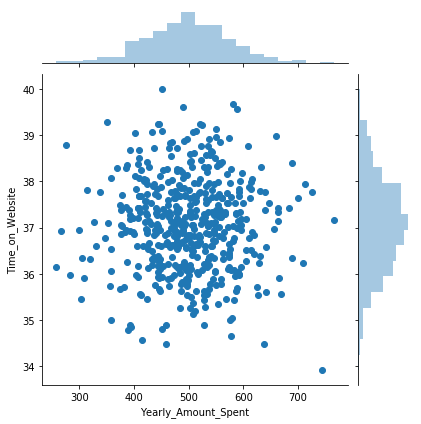

In [6]:
# it seems there is no correlation between Time on Website and Yearly Amount spent.
sns.jointplot(x='Yearly_Amount_Spent',y='Time_on_Website',data=df)
plt.show()

In [7]:
df[['Yearly_Amount_Spent','Time_on_Website']].corr()

,Yearly_Amount_Spent,Time_on_Website
Yearly_Amount_Spent,1.000000,-0.002641
Time_on_Website,-0.002641,1.000000


#### Comparing Time on App and Yearly Amount Spent.

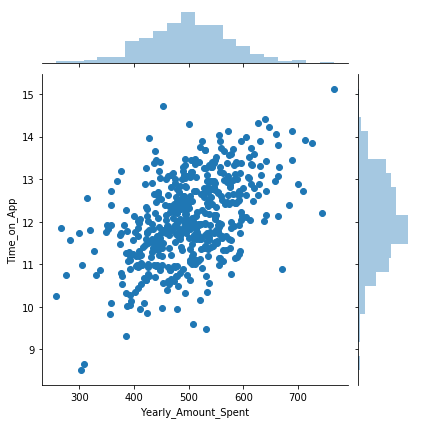

In [8]:
# it seems there is a positive correlation between Time on App and Yearly Amount spent.
sns.jointplot(x='Yearly_Amount_Spent',y='Time_on_App',data=df)
plt.show()

In [9]:
df[['Yearly_Amount_Spent','Time_on_App']].corr()

,Yearly_Amount_Spent,Time_on_App
Yearly_Amount_Spent,1.000000,0.499328
Time_on_App,0.499328,1.000000


#### Expoloring types of relationships across the entire data set using pairplot .

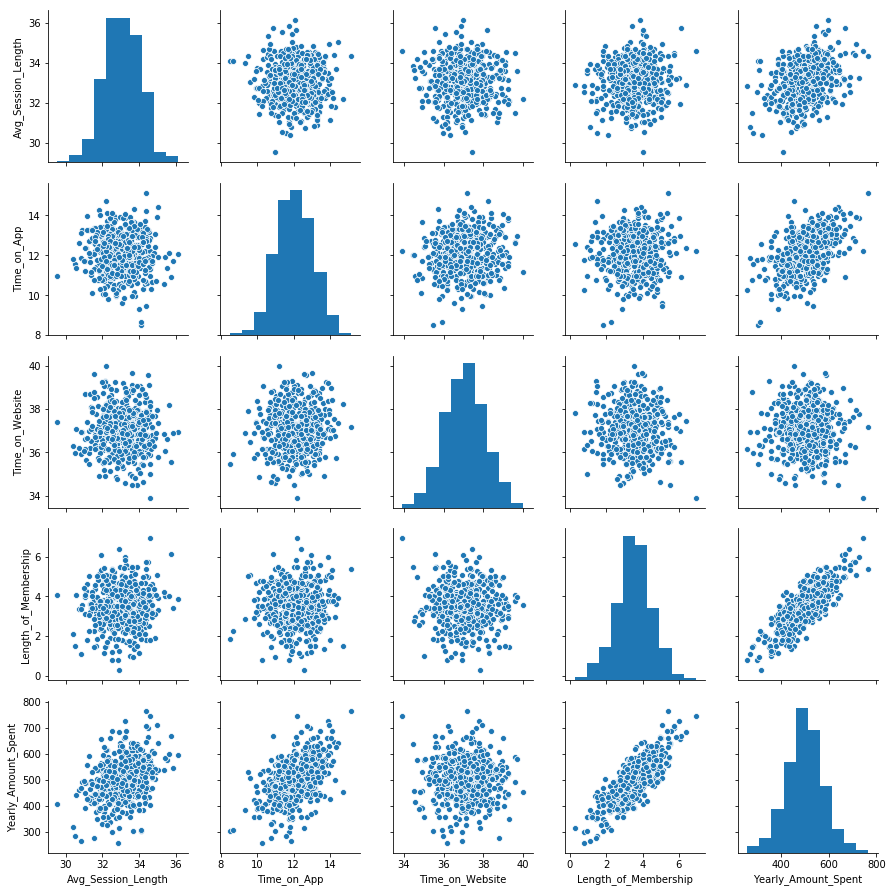

In [10]:
# looks like Length of Membership is most correlated to Yearly Amount Spent
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


#### Creating linear model plot of Length of Membership and Yearly Amount Spent. 

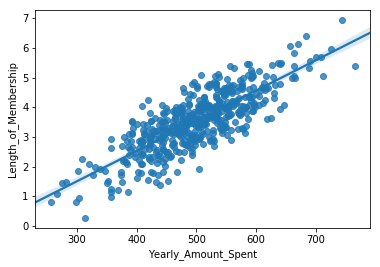

In [12]:
# the data fits
sns.regplot(x='Yearly_Amount_Spent',y='Length_of_Membership',data=df)
plt.show()

#### Train and Test split

In [13]:
y = df.Yearly_Amount_Spent
x = df.loc[:,'Avg_Session_Length':'Length_of_Membership']

In [14]:
# random_state guarantees the same output everytime the program is run
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=85)

#### Prediction and do a scatter plot.

In [15]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
pred_y = lm.predict(x_test)

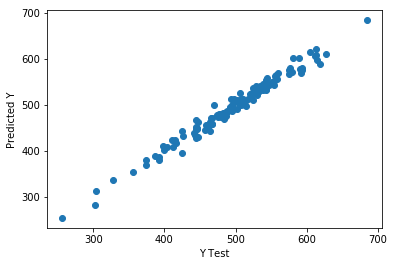

In [16]:
# They match but accuracy is not 100%
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

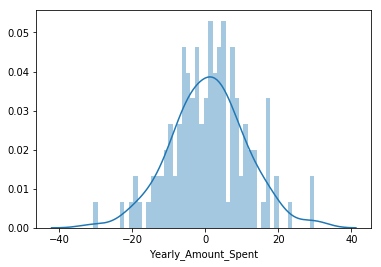

In [17]:
#Residual Plot to check how good the model fits:
sns.distplot((y_test - pred_y), bins=50)

#### Root Mean Squared Error

In [18]:
np.sqrt(metrics.mean_squared_error(y_test, pred_y))

10.320122650211058

#### Based on coefficients interpret company should focus more on their mobile app:

In [19]:
# They should focus more on Mobile App (coefficients: 39.1)
lm.coef_

array([25.8900575 , 39.10639479,  0.51713276, 61.36373131])

In [20]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,25.890057
Time_on_App,39.106395
Time_on_Website,0.517133
Length_of_Membership,61.363731


**Time On App** leads to a higher revenue. For every <b>1</b> unit increase in Time on App, there's an increase of **39.1** in dollar spent.